In [178]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy 

In [155]:
class Hopfield:
    def __init__(self, x):
        self.n = 1
        self.W = x @ x.T - np.identity(len(x))
        
    def store(self, x):
        self.W = (self.W*(self.n) + x @ x.T)/(self.n+1)
        self.n += 1
        
    def recall(self, x):
        for t in range(10000):
            if np.all(np.sign(self.W@x) == x):
                return x
            else:
                x = np.sign(self.W@x)
        return x

In [236]:
def test_capacity(size):
    
    first_memory = np.random.choice([-1,1],(size,1))
    first_corrupted = deepcopy(first_memory)
    first_corrupted[np.random.randint(size)] *= -1
    
    memories = [first_memory]
    corrupted = [first_corrupted]
    network = Hopfield(first_memory)
    
    recalled = memories
    while np.all([np.all(r==m) for r,m in zip(recalled,memories)]):
        
        new_memory = np.random.choice([-1,1],(size,1))
        memories.append(new_memory)
        network.store(new_memory)
        
        new_corrupted = deepcopy(new_memory)
        new_corrupted[np.random.randint(size)] *= -1
        corrupted.append(new_corrupted)
        
        recalled = [network.recall(cormem) for cormem in corrupted]
        
    return len(memories)

test_capacity = np.vectorize(test_capacity)

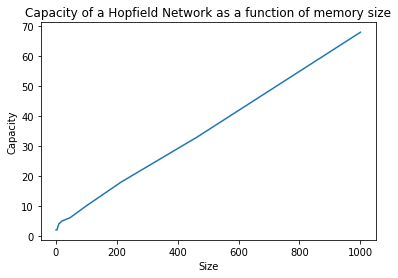

In [260]:
sizes = np.logspace(0,3,10).astype('int')

plt.plot(sizes, test_capacity(sizes))
plt.xlabel('Size')
plt.ylabel('Capacity')
plt.title('Capacity of a Hopfield Network as a function of memory size')
plt.show()